In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 

In [2]:
#load data
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [3]:
#Normalizing Data
x_train=x_train.astype('float64')
x_train=x_train/255.0
x_train.shape 

(50000, 32, 32, 3)

In [4]:
x_test=x_test.astype('float64')
x_test=x_test/255.0
x_test.shape   

(10000, 32, 32, 3)

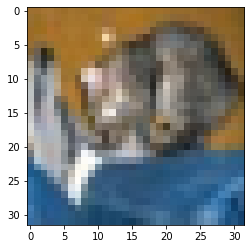

In [5]:
#Test Image
plt.imshow(x_test[0])

In [6]:
model=tf.keras.models.Sequential()

In [7]:
#Layer 1
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same',activation='relu', kernel_initializer='orthogonal', input_shape=[32,32,3]))

In [8]:
#Layer 2
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same',activation='relu', kernel_initializer='he_uniform'))

In [9]:
#Max Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [10]:
#Layer 3
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu', kernel_initializer='he_uniform'))

In [11]:
#Layer 4
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu', kernel_initializer='he_uniform'))

In [12]:
#Max Pooling 2
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [13]:
#Flatten
model.add(tf.keras.layers.Flatten())

In [14]:
#Dropout - to reduce chances of over-fitting
model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [15]:
#First fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [16]:
#Output Layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [18]:
#compiling
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.3991 - sparse_categorical_accuracy: 0.4939
Epoch 2/10
1563/1563 [==============================] - 216s 138ms/step - loss: 0.9777 - sparse_categorical_accuracy: 0.6527
Epoch 3/10
1563/1563 [==============================] - 208s 133ms/step - loss: 0.8161 - sparse_categorical_accuracy: 0.7136
Epoch 4/10
1563/1563 [==============================] - 209s 134ms/step - loss: 0.7288 - sparse_categorical_accuracy: 0.7429
Epoch 5/10
1563/1563 [==============================] - 207s 132ms/step - loss: 0.6613 - sparse_categorical_accuracy: 0.7654
Epoch 6/10
1563/1563 [==============================] - 204s 131ms/step - loss: 0.6014 - sparse_categorical_accuracy: 0.7870
Epoch 7/10
1563/1563 [==============================] - 195s 125ms/step - loss: 0.5607 - sparse_categorical_accuracy: 0.8004
Epoch 8/10
1563/1563 [==============================] - 192s 123ms/step - loss: 0.5244 - sparse_categorical_accuracy: 0.8143


In [20]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 0.6541 - sparse_categorical_accuracy: 0.7809


In [21]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7809000015258789
